In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Loading
df = pd.read_csv("dataset.csv", header=None)
df.head(5)

# Normalizing
n_data = normalize(df)

# Splitting into training and testing. 80% for training, 20% for testing. random split.
X_train, X_test, y_train, y_test = [], [], [], []
for i in range(10):
    indices = np.arange(i * 170, (i + 1) * 170)
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(n_data[indices], [i] * 170, test_size=20, random_state=42)
    X_train.append(X_train_sub[:150])
    X_test.append(X_test_sub)
    y_train.append(y_train_sub[:150])
    y_test.append(y_test_sub)

X_train = np.concatenate(X_train)
X_test = np.concatenate(X_test)
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)


In [2]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,35,45,45,48,50,52,54,60,61,65,...,7,6,7,6,6,8,8,9,9,9
1,13,12,11,13,11,12,11,12,16,22,...,47,68,74,64,71,72,72,67,62,58
2,12,15,20,24,27,30,42,48,49,57,...,6,6,12,17,15,10,9,9,8,7
3,9,8,7,7,8,9,15,19,29,34,...,123,54,10,10,10,7,6,7,7,18
4,114,112,112,112,112,108,116,118,118,115,...,65,62,59,53,49,44,37,36,37,42


In [3]:
X_train

array([[0.0108697 , 0.0108697 , 0.0108697 , ..., 0.00187409, 0.00187409,
        0.0022489 ],
       [0.00462358, 0.00561435, 0.00528409, ..., 0.00165128, 0.00198153,
        0.00165128],
       [0.00423186, 0.00528983, 0.00476085, ..., 0.00264491, 0.00264491,
        0.00264491],
       ...,
       [0.06178158, 0.06178158, 0.06178158, ..., 0.01021183, 0.01021183,
        0.00970124],
       [0.02290939, 0.01718204, 0.01360245, ..., 0.00572735, 0.00572735,
        0.00572735],
       [0.0446451 , 0.0446451 , 0.04518299, ..., 0.01344732, 0.01775046,
        0.02097782]])

In [4]:
from collections import Counter
#implementation of knn 

class KNNClassifier:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        #making distance matric using euclidean distance.
    
    def _distance(self, x1, x2):
        #it involves applying the equlidean distance formula on 2 rows: x1,x1.then taking sqrt.
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x1 - x2)
        #finding cosine that is X.Y / |X||Y|.
        elif self.distance_metric == 'cosine':
            return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        else:
            raise ValueError("Unsupported distance metric")
    
    def labelfinder(self, X_train, y_train, x_test):
        #will predict labels for y-test here.
        distances = [(self._distance(x, x_test), y) for x, y in zip(X_train, y_train)]
        #have to calculate distance btw each test and train
        distances.sort(key=lambda x: x[0])
        #will sort them.
        k_nearest = distances[:self.k]
        #selection of neighbour here.
        k_nearest_labels = [label for _, label in k_nearest]
        # have to count here
        return Counter(k_nearest_labels).most_common(1)[0][0]
    
    #return the highest count label. i.e answer


In [5]:
def evaluate_knn(X_train, y_train, X_test, y_test):
    distance_metrics = ['euclidean']#, 'cosine']
    ks = [2, 5, 7, 11 , 13, 15 , 17, 37]
    for k in ks:
        for dm in distance_metrics:
            correct = 0
            knn = KNNClassifier(k, dm)
            for i in range(len(X_test)):
                prediction = knn.labelfinder(X_train, y_train, X_test[i])
                if prediction == y_test[i]:
                    correct += 1
            accuracy = correct / len(X_test)
            print("k = ",k, " " ,dm , "accuracy = " ,accuracy*100 , "%")


print("80 - 20 ratio dataset: ")
evaluate_knn(X_train, y_train, X_test, y_test)


80 - 20 ratio dataset: 
k =  2   euclidean accuracy =  100.0 %
k =  5   euclidean accuracy =  98.5 %
k =  7   euclidean accuracy =  96.5 %
k =  11   euclidean accuracy =  95.5 %
k =  13   euclidean accuracy =  95.0 %
k =  15   euclidean accuracy =  93.0 %
k =  17   euclidean accuracy =  93.0 %
k =  37   euclidean accuracy =  87.0 %


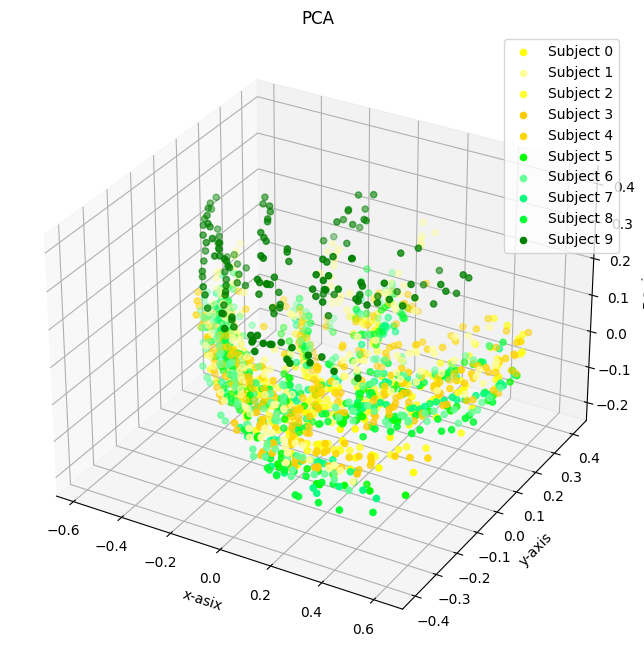

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA
pca = PCA(n_components=3) #3 axis=x,y,z
X_train_pca = pca.fit_transform(X_train)
#fits the PCA model to the training data and transforms it into the reduced-dimensional space defined by the principal components.
X_test_pca = pca.transform(X_test) #applies the learned transformation from the training data to the test datato obtain its representation in the reduced-dimensional space.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

shades_of_yellow = ['#FFFF00', '#FFFF99', '#FFFF33', '#FFCC00', '#FFD700']
shades_of_green = ['#00FF00', '#66FF99', '#00FF7F', '#00FF33', '#008000']
shades_of_blue = ['#0000FF', '#6699FF', '#00BFFF', '#87CEEB', '#4169E1']
colors = shades_of_yellow + shades_of_green + shades_of_blue

for i in range(10):
    ax.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], X_train_pca[y_train == i, 2], c=colors[i], label=f"Subject {i}")
ax.set_xlabel('x-asix')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('PCA')
ax.legend()
plt.show()


In [7]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))

# Gaussian Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))

print("SVM Accuracy ", svm_accuracy*100)
#there were no misclassifications, and the classifier achieved perfect accuracy on the test data.
print("GaussianNB Accuracy ", nb_accuracy*100)
#there were some misclassifications, and the classifier achieved a reasonably high level of accuracy but not perfect.


SVM Accuracy  100.0
GaussianNB Accuracy  85.0


train = 100 - test = 70

In [8]:
from sklearn.model_selection import train_test_split

X_trainn, X_testt, y_trainn, y_testt = [], [], [], []

for i in range(10):
    indices = np.arange(i * 170, (i + 1) * 170)
    
    # 100 - 70 
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(n_data[indices], [i] * 170, test_size=70, train_size=100, random_state=42)
    X_trainn.append(X_train_sub)
    X_testt.append(X_test_sub)
    y_trainn.append(y_train_sub)
    y_testt.append(y_test_sub)

#new 100 - 70 splitted data
X_trainn = np.concatenate(X_trainn)
X_testt = np.concatenate(X_testt)
y_trainn = np.concatenate(y_trainn)
y_testt = np.concatenate(y_testt)

print("for 10-7 ratio data: ")
evaluate_knn(X_trainn, y_trainn, X_testt, y_testt)


for 10-7 ratio data: 
k =  2   euclidean accuracy =  97.85714285714285 %
k =  5   euclidean accuracy =  95.14285714285714 %
k =  7   euclidean accuracy =  93.0 %
k =  11   euclidean accuracy =  92.0 %
k =  13   euclidean accuracy =  91.57142857142857 %
k =  15   euclidean accuracy =  91.57142857142857 %
k =  17   euclidean accuracy =  90.85714285714286 %
k =  37   euclidean accuracy =  86.0 %


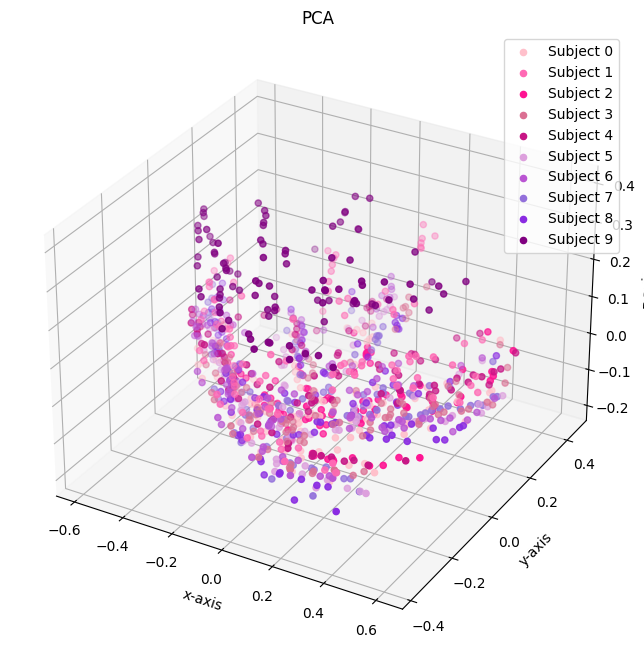

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA
pca = PCA(n_components=3) #v wanted 3 princple components
X_trainpca = pca.fit_transform(X_trainn) #transforming into a new feature space with pca
X_testpca = pca.transform(X_testt) #consistency in dimensionality reduction between the training and test data.

# Visualize in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') #making 3d space

shades_of_pink = ['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093', '#C71585']
shades_of_purple = ['#DDA0DD', '#BA55D3', '#9370DB', '#8A2BE2', '#800080']
colors = shades_of_pink + shades_of_purple

for i in range(10): #only 10 subjects
    ax.scatter(X_trainpca[y_trainn == i, 0], X_trainpca[y_trainn == i, 1], X_trainpca[y_trainn == i, 2], c=colors[i], label=f"Subject {i}")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('PCA')
ax.legend()
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# SVM
svm_classifierr = SVC()
svm_classifierr.fit(X_trainn, y_trainn)
svm_accuracyy = accuracy_score(y_testt, svm_classifierr.predict(X_testt))

# Gaussian Naive Bayes
nb_classifierr = GaussianNB()
nb_classifierr.fit(X_trainn, y_trainn)
nb_accuracyy = accuracy_score(y_testt, nb_classifierr.predict(X_testt))

print("SVM Accuracy ",svm_accuracyy*100)
#this indicates svm ismostly correct
print("GaussianNB Accuracy ", nb_accuracyy*100)
#not fully correct but still pretty good 


SVM Accuracy  98.14285714285714
GaussianNB Accuracy  85.0
